# Association and Non-Deterministic Models — STARTER NOTEBOOK

**Applied Machine Learning 2 @ Newman University**

*Prof. Ricky Boyer*

**Linh Toan**

**Important note!** Before you turn in this lab notebook, make sure everything runs as expected:

- First, **restart the kernel** -- in the menubar, select Kernel$\rightarrow$Restart.
- Then **run all cells** -- in the menubar, select Cell$\rightarrow$Run All.

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`

# Part 1: Association rule mining

In this notebook, you'll implement the basic pairwise association rule mining algorithm. This is a business problem that comes up frequently. The ability to determine how purchases of certain products affect the likelihood of purchasing other products has immediately actionable implications.

To keep the implementation simple, you will apply your implementation to a simplified dataset, namely, letters ("items") in words ("receipts" or "baskets"). We'll be using this as a proxy for educational purposes, then move on to a typical association problem with grocery carts.

## Problem definition

Let's say you have a fragment of text in some language. You wish to know whether there are association rules among the letters that appear in a word. In this problem:

- Words are "receipts"
- Letters within a word are "items"

You want to know whether there are _association rules_ of the form, $a \implies b$, where $a$ and $b$ are letters. You will write code to do that by calculating for each rule its _confidence_, $\mathrm{conf}(a \implies b)$, which is an estimate of the conditional probability of $b$ given $a$, or $\mathrm{Pr}[b \,|\, a]$.

## Sample text input

Let's carry out this analysis on a "dummy" text fragment, which graphic designers refer to as the [_lorem ipsum_](https://en.wikipedia.org/wiki/Lorem_ipsum):

In [1]:
latin_text = """
Sed ut perspiciatis, unde omnis iste natus error sit
voluptatem accusantium doloremque laudantium, totam
rem aperiam eaque ipsa, quae ab illo inventore
veritatis et quasi architecto beatae vitae dicta
sunt, explicabo. Nemo enim ipsam voluptatem, quia
voluptas sit, aspernatur aut odit aut fugit, sed
quia consequuntur magni dolores eos, qui ratione
voluptatem sequi nesciunt, neque porro quisquam est,
qui dolorem ipsum, quia dolor sit amet consectetur
adipisci[ng] velit, sed quia non numquam [do] eius
modi tempora inci[di]dunt, ut labore et dolore
magnam aliquam quaerat voluptatem. Ut enim ad minima
veniam, quis nostrum exercitationem ullam corporis
suscipit laboriosam, nisi ut aliquid ex ea commodi
consequatur? Quis autem vel eum iure reprehenderit,
qui in ea voluptate velit esse, quam nihil molestiae
consequatur, vel illum, qui dolorem eum fugiat, quo
voluptas nulla pariatur?

At vero eos et accusamus et iusto odio dignissimos
ducimus, qui blanditiis praesentium voluptatum
deleniti atque corrupti, quos dolores et quas
molestias excepturi sint, obcaecati cupiditate non
provident, similique sunt in culpa, qui officia
deserunt mollitia animi, id est laborum et dolorum
fuga. Et harum quidem rerum facilis est et expedita
distinctio. Nam libero tempore, cum soluta nobis est
eligendi optio, cumque nihil impedit, quo minus id,
quod maxime placeat, facere possimus, omnis voluptas
assumenda est, omnis dolor repellendus. Temporibus
autem quibusdam et aut officiis debitis aut rerum
necessitatibus saepe eveniet, ut et voluptates
repudiandae sint et molestiae non recusandae. Itaque
earum rerum hic tenetur a sapiente delectus, ut aut
reiciendis voluptatibus maiores alias consequatur
aut perferendis doloribus asperiores repellat.
"""

print("First 100 characters:\n  {} ...".format(latin_text[:100]))

First 100 characters:
  
Sed ut perspiciatis, unde omnis iste natus error sit
voluptatem accusantium doloremque laudantium,  ...


**Data cleaning.** Like most data in the real world, this dataset is noisy. It has both uppercase and lowercase letters, words have repeated letters, and there are all sorts of non-alphabetic characters. For our analysis, we should keep all the letters and spaces (so we can identify distinct words), but we should ignore case and ignore repetition within a word.

For example, the eighth word of this text is "error." As an _itemset_, it consists of the three unique letters, $\{e, o, r\}$. That is, treat the word as a set, meaning you only keep the unique letters.

This itemset has three possible _itempairs_: $\{e, o\}$, $\{e, r\}$, and $\{o, r\}$.

Start by writing some code to help "clean up" the input.

**Exercise 0** (`normalize_string_test`: 15 points). Complete the following function, `normalize_string(s)`, which should take a string (`str` object) `s` as input and returns a new string with all characters converted to lowercase and all non-alphabetic, non-space characters removed.

> Scanning the sample text, `latin_text`, you may see things that look like special cases. For instance, `inci[di]dunt` and `[do]`. For these, simply remove the non-alphabetic characters and only separate the words if there is explicit whitespace.
>
> For instance, `inci[di]dunt` would become `incididunt` (as a single word) and `[do]` would become `do` as a standalone word because the original string has whitespace on either side. A period or comma without whitespace would, similarly, just be treated as a non-alphabetic character inside a word _unless_ there is explicit whitespace. So `e pluribus.unum basium` would become `e pluribusunum basium` even though your common-sense understanding might separate `pluribus` and `unum`.

In [2]:
def normalize_string(s):
    assert type (s) is str
    # YOUR CODE HERE
    
    essential_chars = [c for c in s.lower() if c.isalpha() or c.isspace()]
    return ''.join(essential_chars)
    
    raise NotImplementedError()
# Demo:
print(latin_text[:100], "...\n=>", normalize_string(latin_text[:100]), "...")


Sed ut perspiciatis, unde omnis iste natus error sit
voluptatem accusantium doloremque laudantium,  ...
=> 
sed ut perspiciatis unde omnis iste natus error sit
voluptatem accusantium doloremque laudantium  ...


In [3]:
# `normalize_string_test`: Test cell
norm_latin_text = normalize_string(latin_text)

assert type(norm_latin_text) is str
assert len(norm_latin_text) == 1694
assert all([c.isalpha() or c.isspace() for c in norm_latin_text])
assert norm_latin_text == norm_latin_text.lower()

print("\n(Passed! You got 15 points!)")


(Passed! You got 15 points!)


**Exercise 1** (`get_normalized_words_test`: 15 points). Implement the following function, `get_normalized_words(s)`: given a string (`str` object) `s`, returns a list of its words, normalized per the definition of `normalize_string()`.

In [4]:
def get_normalized_words(s):
    assert type (s) is str
    # YOUR CODE HERE
    
    words = normalize_string(s)
    return words.split()
    
    raise NotImplementedError()

# Demo:
print ("First five words:\n{}".format (get_normalized_words (latin_text)[:5]))

First five words:
['sed', 'ut', 'perspiciatis', 'unde', 'omnis']


In [5]:
# `get_normalized_words_test`: Test cell
norm_latin_words = get_normalized_words(norm_latin_text)

assert len(norm_latin_words) == 250
for i, w in [(20, 'illo'), (73, 'eius'), (144, 'deleniti'), (248, 'asperiores')]:
    assert norm_latin_words[i] == w

print ("\n(Passed! Congrats you got 15 points!)")


(Passed! Congrats you got 15 points!)


**Exercise 2** (`make_itemsets_test`: 10 points). Implement a function, `make_itemsets`, that given a list of strings converts the characters of each string into an itemset, returning the list of itemsets.

In [6]:
def make_itemsets(words):
    # YOUR CODE HERE
    itemset = []
    for el in words:
        itemset.append(set(el))
    return itemset

In [7]:
# `make_itemsets_test`: Test cell
norm_latin_itemsets = make_itemsets(norm_latin_words)

# Lists should have the same size
assert len(norm_latin_itemsets) == len(norm_latin_words)

# Test a random sample
from random import sample
for i in sample(range(len(norm_latin_words)), 5):
    print('[{}]'.format(i), norm_latin_words[i], "-->", norm_latin_itemsets[i])
    assert set(norm_latin_words[i]) == norm_latin_itemsets[i]
print("\n(Passed! You got 10 points!)")

[30] explicabo --> {'o', 'a', 'i', 'b', 'x', 'p', 'e', 'c', 'l'}
[71] numquam --> {'a', 'u', 'n', 'm', 'q'}
[230] itaque --> {'a', 'u', 'q', 'e', 'i', 't'}
[200] facere --> {'a', 'r', 'e', 'c', 'f'}
[3] unde --> {'e', 'n', 'd', 'u'}

(Passed! You got 10 points!)


## Aside: Default dictionaries

The overall algorithm requires maintaining a table of item-pair (tuples) counts. It would be convenient to use a dictionary to store this table, where keys refer to item-pairs and the values are the counts.

However, with Python's built-in dictionaries, you always to have to check whether a key exists before updating it. For example, consider this code fragment:

```python
D = {'existing-key': 5} # Dictionary with one key-value pair

D['existing-key'] += 1 # == 6
D['new-key'] += 1  # Error: 'new-key' does not exist!
```

The second attempt causes an error because `'new-key'` is not yet a member of the dictionary. So, a more correct approach would be to do the following:

```python
D = {'existing-key': 5} # Dictionary with one key-value pair

if 'existing-key' not in D:
    D['existing-key'] = 0
D['existing-key'] += 1
   
if 'new-key' not in D:
    D['new-key'] = 0
D['new-key'] += 1
```

This pattern is so common that there is a special form of dictionary, called a _default dictionary_, which is available from the `collections` module: [`collections.defaultdict`](https://docs.python.org/3/library/collections.html?highlight=defaultdict#collections.defaultdict).

When you create a default dictionary, you need to provide a "factory" function that the dictionary can use to create an initial value when the key does *not* exist. For instance, in the preceding example, when the key was not present the code creates a new key with the initial value of an integer zero (0). Indeed, this default value is the one you get when you call `int()` with no arguments:

In [8]:
print (int ())

0


In [9]:
from collections import defaultdict

D2 = defaultdict (int) # Empty dictionary

D2['existing-key'] = 5 # Create one key-value pair

D2['existing-key'] += 1 # Update
D2['new-key'] += 1

print (D2)

defaultdict(<class 'int'>, {'existing-key': 6, 'new-key': 1})


**Exercise 3** (`update_pair_counts_test`: 15 points). Start by implementing a function that enumerates all item-pairs within an itemset and updates a table in-place that tracks the counts of those item-pairs.

You may assume all items in the given itemset (`itemset` argument) are distinct, i.e., that you may treat it as you would any set-like collection. You may also assume `pair_counts` is a default dictionary.

In [10]:
from collections import defaultdict
# from itertools import combinations
from itertools import permutations

def update_pair_counts (pair_counts, itemset):
    """
    Updates a dictionary of pair counts for
    all pairs of items in a given itemset.
    """
    assert type (pair_counts) is defaultdict
    # YOUR CODE HERE
    combo = permutations(itemset, 2)
    for c in combo:
        pair_counts[c] += 1
    return pair_counts

In [11]:
# `update_pair_counts_test`: Test cell
itemset_1 = set("error")
itemset_2 = set("dolor")
pair_counts = defaultdict(int)

update_pair_counts(pair_counts, itemset_1)
assert len(pair_counts) == 6
update_pair_counts(pair_counts, itemset_2)
assert len(pair_counts) == 16

print('"{}" + "{}"\n==> {}'.format (itemset_1, itemset_2, pair_counts))
for a, b in pair_counts:
    assert (b, a) in pair_counts
    assert pair_counts[(a, b)] == pair_counts[(b, a)]
    
print ("\n(Passed! You got 15 points!)")

"{'e', 'o', 'r'}" + "{'o', 'l', 'd', 'r'}"
==> defaultdict(<class 'int'>, {('e', 'o'): 1, ('e', 'r'): 1, ('o', 'e'): 1, ('o', 'r'): 2, ('r', 'e'): 1, ('r', 'o'): 2, ('o', 'l'): 1, ('o', 'd'): 1, ('l', 'o'): 1, ('l', 'd'): 1, ('l', 'r'): 1, ('d', 'o'): 1, ('d', 'l'): 1, ('d', 'r'): 1, ('r', 'l'): 1, ('r', 'd'): 1})

(Passed! You got 15 points!)


**Exercise 4** (`update_item_counts_test`: 15 points). Implement a procedure that, given an itemset, updates a table to track counts of each item.

As with the previous exercise, you may assume all items in the given itemset (`itemset`) are distinct, i.e., that you may treat it as you would any set-like collection. You may also assume the table (`item_counts`) is a default dictionary.

In [12]:
def update_item_counts(item_counts, itemset):
    for item in itemset:
        item_counts[item] += 1
    return item_counts

In [13]:
# `update_item_counts_test`: Test cell
itemset_1 = set("error")
itemset_2 = set("dolor")

item_counts = defaultdict(int)
update_item_counts(item_counts, itemset_1)
assert len(item_counts) == 3
update_item_counts(item_counts, itemset_2)
assert len(item_counts) == 5

assert item_counts['d'] == 1
assert item_counts['e'] == 1
assert item_counts['l'] == 1
assert item_counts['o'] == 2
assert item_counts['r'] == 2

print("\n(Passed! You got 15 points!)")


(Passed! You got 15 points!)


**Exercise 5** (`filter_rules_by_conf_test`: 20 points). Given tables of item-pair counts and individual item counts, as well as a confidence threshold, return the rules that meet the threshold. The returned rules should be in the form of a dictionary whose key is the tuple, $(a, b)$ corresponding to the rule $a \Rightarrow b$, and whose value is the confidence of the rule, $\mathrm{conf}(a \Rightarrow b)$.

You may assume that if $(a, b)$ is in the table of item-pair counts, then both $a$ and $b$ are in the table of individual item counts.

In [14]:
def filter_rules_by_conf (pair_counts, item_counts, threshold):
    rules = {} # (item_a, item_b) -> conf (item_a => item_b)
    # YOUR CODE HERE
    for (a, b), count_ab in pair_counts.items():
        confidence = count_ab / item_counts[a]
        if confidence >= threshold:
            rules[(a, b)] = confidence
    return rules

In [15]:
# `filter_rules_by_conf_test`: Test cell
pair_counts = {('man', 'woman'): 5,
               ('bird', 'bee'): 3,
               ('red fish', 'blue fish'): 7}
item_counts = {'man': 7,
               'bird': 9,
               'red fish': 11}
rules = filter_rules_by_conf (pair_counts, item_counts, 0.5)
print("Found these rules:", rules)
assert ('man', 'woman') in rules
assert ('bird', 'bee') not in rules
assert ('red fish', 'blue fish') in rules
print("\n(Passed! You got 20 points!)")

Found these rules: {('man', 'woman'): 0.7142857142857143, ('red fish', 'blue fish'): 0.6363636363636364}

(Passed! You got 20 points!)


**Aside: pretty printing the rules.** The output of rules above is a little messy; here's a little helper function that structures that output a little, which will be useful for both debugging and reporting purposes.

In [16]:
def gen_rule_str(a, b, val=None, val_fmt='{:.3f}', sep=" = "):
    text = "{} => {}".format(a, b)
    if val:
        text = "conf(" + text + ")"
        text += sep + val_fmt.format(val)
    return text

def print_rules(rules):
    if type(rules) is dict or type(rules) is defaultdict:
        from operator import itemgetter
        ordered_rules = sorted(rules.items(), key=itemgetter(1), reverse=True)
    else: # Assume rules is iterable
        ordered_rules = [((a, b), None) for a, b in rules]
    for (a, b), conf_ab in ordered_rules:
        print(gen_rule_str(a, b, conf_ab))

# Demo:
print_rules(rules)

conf(man => woman) = 0.714
conf(red fish => blue fish) = 0.636


**Exercise 6** (`find_assoc_rules_test`: 20 points). Using the building blocks you implemented above, complete a function `find_assoc_rules` so that it implements the basic association rule mining algorithm and returns a dictionary of rules.

In particular, your implementation may assume the following:

1. As indicated in its signature, below, the function takes two inputs: `receipts` and `threshold`.
1. The input, `receipts`, is a collection of itemsets: for every receipt `r` in `receipts`, `r` may be treated as a collection of unique items.
2. The input `threshold` is the minimum desired confidence value. That is, the function should only return rules whose confidence is at least `threshold`.

The returned dictionary, `rules`, should be keyed by tuples $(a, b)$ corresponding to the rule $a \Rightarrow b$; each value should the the confidence $\mathrm{conf}(a \Rightarrow b)$ of the rule.

In [17]:
from collections import defaultdict
from itertools import combinations
from itertools import permutations

def find_assoc_rules(receipts, threshold):
    item_counts = defaultdict(int)
    pair_counts = defaultdict(int)
    
    for r in receipts:
        item_counts = update_item_counts(item_counts, r)
        pair_counts = update_pair_counts(pair_counts, r)
    
    rules = filter_rules_by_conf(pair_counts, item_counts, threshold)
    
    return rules

In [18]:
# `find_assoc_rules_test`: Test cell
receipts = [set('abbc'), set('ac'), set('a')]
rules = find_assoc_rules(receipts, 0.6)

print("Original receipts as itemsets:", receipts)
print("Resulting rules:")
print_rules(rules)

assert ('a', 'b') not in rules
assert ('b', 'a') in rules
assert ('a', 'c') in rules
assert ('c', 'a') in rules
assert ('b', 'c') in rules
assert ('c', 'b') not in rules

print("\n(Passed! You got 20 points!)")

Original receipts as itemsets: [{'b', 'a', 'c'}, {'a', 'c'}, {'a'}]
Resulting rules:
conf(b => a) = 1.000
conf(b => c) = 1.000
conf(c => a) = 1.000
conf(a => c) = 0.667

(Passed! You got 20 points!)


**Exercise 7** (`latin_rules_test`: 10 points). For the Latin string, `latin_text`, use your `find_assoc_rules()` function to compute the rules whose confidence is at least 0.75. Store your result in a variable named `latin_rules`.

In [19]:
# Generate `latin_rules`:
#YOUR CODE HERE
latin_itemset = make_itemsets(norm_latin_words)

# Filter out tuples where the two letters are the same
latin_rules = find_assoc_rules(latin_itemset, 0.75)

# Inspect your result:
print_rules(latin_rules)

conf(q => u) = 1.000
conf(x => e) = 1.000
conf(h => i) = 0.833
conf(x => i) = 0.833
conf(v => t) = 0.818
conf(r => e) = 0.800
conf(v => e) = 0.773
conf(b => i) = 0.750
conf(g => i) = 0.750
conf(f => i) = 0.750


In [20]:
# `latin_rules_test`: Test cell
assert len(latin_rules) == 10
assert all([0.75 <= v <= 1.0 for v in latin_rules.values()])
for ab in ['xe', 'qu', 'hi', 'xi', 'vt', 're', 've', 'fi', 'gi', 'bi']:
    assert (ab[0], ab[1]) in latin_rules
print("\n(Passed! You got 10 points!)")


(Passed! You got 10 points!)


## Putting it all together: Actual baskets!

Let's take a look at some real data that [someone](http://www.salemmarafi.com/code/market-basket-analysis-with-r/) was kind enough to prepare for a similar exercise designed for the R programming environment.

First, here's a code snippet to download the data, which is a text file:

In [21]:
import requests
response = requests.get ('https://raw.githubusercontent.com/boyerr111/newmanu_AML2/master/datasets/groceries.csv')
groceries_file = response.text  # or response.content for raw bytes

print (groceries_file[0:250] + "...\n... (etc.) ...") # Prints the first 250 characters only

citrus fruit,semi-finished bread,margarine,ready soups
tropical fruit,yogurt,coffee
whole milk
pip fruit,yogurt,cream cheese ,meat spreads
other vegetables,whole milk,condensed milk,long life bakery product
whole milk,butter,yogurt,rice,abrasive clea...
... (etc.) ...


Each line of this file is some customer's shopping basket. The items that the customer bought are stored as a comma-separated list of values.

**Exercise 8: Your task.** (`basket_rules_test`: 30 points). Your final task in this notebook is to mine this dataset for pairwise association rules. In particular, your code should produce (no pun intended!) a final dictionary, `basket_rules`, that meet these conditions (read carefully!):

1. The keys are pairs $(a, b)$, where $a$ and $b$ are item names (as strings).
2. The values are the corresponding confidence scores, $\mathrm{conf}(a \Rightarrow b)$.
3. Only include rules $a \Rightarrow b$ where item $a$ occurs at least `MIN_COUNT` times and $\mathrm{conf}(a \Rightarrow b)$ is at least `THRESHOLD`.

Pay particular attention to Condition 3: not only do you have to filter by a confidence threshold, but you must exclude rules $a \Rightarrow b$ where the item $a$ does not appear "often enough." There is a code cell below that defines values of `MIN_COUNT` and `THRESHOLD`, but your code should work even if we decide to change those values later on.

> _Aside_: Why would an analyst want to enforce Condition 3?

Your solution can use the `groceries_file` string variable defined above as its starting point. And since it's in the same notebook, you may, of course, reuse any of the code you've written above as needed. Lastly, if you feel you need additional code cells, you can create them _after_ the code cell marked for your solution but _before_ the code marked, `### TEST CODE ###`.

In [22]:
# Confidence threshold
THRESHOLD = 0.5

# Only consider rules for items appearing at least `MIN_COUNT` times.
MIN_COUNT = 10

In [23]:
# YOUR CODE HERE
### BEGIN SOLUTION
# Create itemsets and compute individual item counts
groceries_item = [set(g.split(',')) for g in groceries_file.split('\n')]

item_counts = defaultdict(int)
pair_counts = defaultdict(int)

for g in groceries_item:
    update_item_counts(item_counts, g)
    update_pair_counts(pair_counts, g)

# Search for an initial set of association rules
rules = find_assoc_rules(groceries_item, THRESHOLD)

# Filter those rules to exclude infrequent items
basket_rules = {(a,b): confidence for (a,b), confidence in rules.items() if item_counts[a] >= MIN_COUNT}

### END SOLUTION

In [24]:
### `basket_rules_test`: TEST CODE ###
print("Found {} rules whose confidence exceeds {}.".format(len(basket_rules), THRESHOLD))
print("Here they are:\n")
print_rules(basket_rules)

assert len(basket_rules) == 19
assert all([THRESHOLD <= v < 1.0 for v in basket_rules.values()])
ans_keys = [("pudding powder", "whole milk"), ("tidbits", "rolls/buns"), ("cocoa drinks", "whole milk"), ("cream", "sausage"), ("rubbing alcohol", "whole milk"), ("honey", "whole milk"), ("frozen fruits", "other vegetables"), ("cream", "other vegetables"), ("ready soups", "rolls/buns"), ("cooking chocolate", "whole milk"), ("cereals", "whole milk"), ("rice", "whole milk"), ("specialty cheese", "other vegetables"), ("baking powder", "whole milk"), ("rubbing alcohol", "butter"), ("rubbing alcohol", "citrus fruit"), ("jam", "whole milk"), ("frozen fruits", "whipped/sour cream"), ("rice", "other vegetables")]
for k in ans_keys:
    assert k in basket_rules

print("\n(Passed! You got 30 points!)")

Found 19 rules whose confidence exceeds 0.5.
Here they are:

conf(honey => whole milk) = 0.733
conf(frozen fruits => other vegetables) = 0.667
conf(cereals => whole milk) = 0.643
conf(rice => whole milk) = 0.613
conf(rubbing alcohol => whole milk) = 0.600
conf(cocoa drinks => whole milk) = 0.591
conf(pudding powder => whole milk) = 0.565
conf(jam => whole milk) = 0.547
conf(cream => other vegetables) = 0.538
conf(cream => sausage) = 0.538
conf(baking powder => whole milk) = 0.523
conf(tidbits => rolls/buns) = 0.522
conf(rice => other vegetables) = 0.520
conf(cooking chocolate => whole milk) = 0.520
conf(specialty cheese => other vegetables) = 0.500
conf(rubbing alcohol => butter) = 0.500
conf(rubbing alcohol => citrus fruit) = 0.500
conf(ready soups => rolls/buns) = 0.500
conf(frozen fruits => whipped/sour cream) = 0.500

(Passed! You got 30 points!)


# Part 2: Non-deterministic - Markov Chains
## Markov chain analysis of the US airport network

One way to view the airline transportation infrastructure is in the form of a directed _network_ or _graph_, in which vertices are airports and edges are the direct-flight segments that connect them. For instance, if there is a direct flight from Atlanta's Hartsfield-Jackson International Airport ("ATL") to Los Angeles International Airport ("LAX"), then the airport network would have a directed edge from ATL to LAX.

Given the airport network, one question we might ask is, which airports are most critical to disruption of the overall network? That is, if an airport is shut down, thereby leading to all inbound and outbound flights being cancelled, will that catastrophic event have a big impact or a small impact on the overall network?

You would expect "importance" to be related to whether an airport has lots of inbound or outgoing connections. In graph lingo, that's also called the _degree_ of a vertex or node. But if there are multiple routes that can work around a highly connected hub (i.e., a vertex with a high indegree or outdegree), that might not be the case. So let's try to use a PageRank-like scheme to see what we get and compare that to looking at degree.

As it happens, the US Bureau of Transportation Statistics collects data on all flights originating or arriving in the United States. In this notebook, you'll use this data to build an airport network and then use Markov chain analysis to rank the networks by some measure of "criticality."
> Sources: This notebook is adapted from the following: https://www.mongodb.com/blog/post/pagerank-on-flights-dataset. The dataset is a small subset of what is available here: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236

## The formal analysis problem

Let's model the analysis problem as follows.

Consider a "random flyer" to be a person who arrives at an airport $i$, and then randomly selects any direct flight that departs from $i$ and arrives at $j$. We refer to the direct flight from $i$ to $j$ as the _flight segment_ $i \rightarrow j$. Upon arriving at $j$, the flyer repeats the process of randomly selecting a new segment, $j \rightarrow k$. He or she repeats this process forever.

Let $x_i(t)$ be the probability that the flyer is at airport $i$ at time $t$. Take $t$ to be an integer count corresponding to the number of flight segments that the flyer has taken so far, starting at $t=0$. Let $p_{ij}$ be the probability of taking segment $i \rightarrow j$, where $p_{ij} = 0$ means the segment $i \rightarrow j$ is unavailable or does not exist. If there are $n$ airports in all, numbered from $0$ to $n-1$, then the probability that the flyer will be at airport $i$ at time $t+1$, given all the probabilities at time $t$, is

$$
  x_i(t+1) = \sum_{j=0}^{n-1} p_{ji} \cdot x_j(t).
$$

Let $P \equiv [p_{ij}]$ be the matrix of transition probabilities and $x(t) = [x_i(t)]$ the column vector of prior probabilities. Then we can write the above more succinctly for all airports as the matrix-vector product,

$$
  x(t+1) = P^T x(t).
$$

Since $P$ is a probability transition matrix then there exists a steady-state distribution, $x^*$, which is the limit of $x(t)$ as $t$ goes to infinity:

$$\displaystyle \lim_{t \rightarrow \infty} x(t) = x^* \equiv [x_i^*].$$

The larger $x_i^*$, the more likely it is that the random flyer is to be at airport $i$ in the steady state. Therefore, we can take the "importance" or "criticality" of airport $i$ in the flight network to be its steady-state probability, $x_i^*$.

Thus, our data pre-processing goal is to construct $P$ and our analysis goal is to compute the steady-state probability distribution, $x^*$, for a first-order Markov chain system.

## Modules

For this part of the notebook, let's use Pandas for preprocessing the raw data and SciPy's sparse matrix libraries to implement the analysis.

> One of the cells below defines a function, `spy()`, that can be used to visualize the non-zero structure of a sparse matrix.

In [25]:
import numpy as np
import scipy as sp
import scipy.sparse
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

def spy(A, figsize=(6, 6), markersize=0.5):
    """Visualizes a sparse matrix."""
    fig = plt.figure(figsize=figsize)
    plt.spy(A, markersize=markersize)
    plt.show()
    
from IPython.display import display, Markdown

def canonicalize_tibble(X):
    var_names = sorted(X.columns)
    Y = X[var_names].copy()
    Y.sort_values(by=var_names, inplace=True)
    Y.reset_index(drop=True, inplace=True)
    return Y

def tibbles_are_equivalent (A, B):
    A_canonical = canonicalize_tibble(A)
    B_canonical = canonicalize_tibble(B)
    cmp = A_canonical.eq(B_canonical)
    return cmp.all().all()

In [26]:
import requests
import os
import hashlib
import io

def download(file, local_dir="", url_base=None, checksum=None):
    local_file = "{}{}".format(local_dir, file)
    if not os.path.exists(local_file):
        url = "{}{}".format(url_base, file)
        print("Downloading: {} ...".format(url))
        r = requests.get(url)
        with open(local_file, 'wb') as f:
            f.write(r.content)
            
    if checksum is not None:
        with io.open(local_file, 'rb') as f:
            body = f.read()
            body_checksum = hashlib.md5(body).hexdigest()
            assert body_checksum == checksum, \
                "Downloaded file '{}' has incorrect checksum: '{}' instead of '{}'".format(local_file,
                                                                                           body_checksum,
                                                                                           checksum)
    print("'{}' is ready!".format(file))
    
URL_BASE = "https://raw.githubusercontent.com/boyerr111/newmanu_AML2/master/datasets/"
DATA_PATH = ""

datasets = {'L_AIRPORT_ID.csv': 'e9f250e3c93d625cce92d08648c4bbf0',
            'L_CITY_MARKET_ID.csv': 'f430a16a5fe4b9a849accb5d332b2bb8',
            'L_UNIQUE_CARRIERS.csv': 'bebe919e85e2cf72e7041dbf1ae5794e',
            'us-flights--2017-08.csv': 'eeb259c0cdd00ff1027261ca0a7c0332',
            'flights_atl_to_lax_soln.csv': '4591f6501411de90af72693cdbcc08bb',
            'origins_top10_soln.csv': 'de85c321c45c7bf65612754be4567086',
            'dests_soln.csv': '370f4c632623616b3bf26b6f79993fe4',
            'dests_top10_soln.csv': '4c7dd7edf48c4d62466964d6b8c14184',
            'segments_soln.csv': '516a78d2d9d768d78bfb012b77671f38',
            'segments_outdegree_soln.csv': 'b29d60151c617ebafd3a1c58541477c8'
           }

for filename, checksum in datasets.items():
    download(filename, local_dir=DATA_PATH, url_base=URL_BASE, checksum=checksum)
    
print("\n(All data appears to be ready.)")

'L_AIRPORT_ID.csv' is ready!
'L_CITY_MARKET_ID.csv' is ready!
'L_UNIQUE_CARRIERS.csv' is ready!
'us-flights--2017-08.csv' is ready!
'flights_atl_to_lax_soln.csv' is ready!
'origins_top10_soln.csv' is ready!
'dests_soln.csv' is ready!
'dests_top10_soln.csv' is ready!
'segments_soln.csv' is ready!
'segments_outdegree_soln.csv' is ready!

(All data appears to be ready.)


**Airport codes.** Let's begin by looking at airport codes.

In [27]:
airport_codes = pd.read_csv("{}{}".format(DATA_PATH, 'L_AIRPORT_ID.csv'))
airport_codes.head()

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"


**Flight segments.** Next, let's load a file that contains all of US flights that were scheduled in August 2017.

In [28]:
flights = pd.read_csv('{}{}'.format(DATA_PATH, 'us-flights--2017-08.csv'))
print("Number of flight segments: {} [{:.1f} million]".format (len(flights), len(flights)*1e-6))
del flights['Unnamed: 7'] # Cleanup extraneous column
flights.head()

Number of flight segments: 510451 [0.5 million]


,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID
0,2017-08-01,DL,2,12478,31703,14679,33570
1,2017-08-01,DL,4,12889,32211,12478,31703
2,2017-08-01,DL,6,12892,32575,14869,34614
3,2017-08-01,DL,7,14869,34614,12892,32575
4,2017-08-01,DL,10,11292,30325,13487,31650


Each row of this tibble is a _(direct) flight segment_, that is, a flight that left some origin and arrived at a destination on a certain date. As noted earlier, these segments cover a one-month period (August 2017).

As a way of helping to familiarize you with this dataset, I've determined all direct flight segments that originated at Atlanta's Hartsfield-Jackson International Airport and traveled to Los Angeles International. The data is storein a dataframe named `flights_atl_to_lax`, which should be the corresponding subset of rows from `flights`.

In [29]:
def lookup_airport(index):
    return airport_codes.loc[index, 'Code'], airport_codes.loc[index, 'Description']

ATL_ID, ATL_DESC = lookup_airport(373)
LAX_ID, LAX_DESC = lookup_airport(2765)

print("{}: ATL -- {}".format(ATL_ID, ATL_DESC))
print("{}: LAX -- {}".format(LAX_ID, LAX_DESC))
print()

is_atl_origin = (flights['ORIGIN_AIRPORT_ID'] == ATL_ID)
is_lax_dest = (flights['DEST_AIRPORT_ID'] == LAX_ID)
is_atl_to_lax = is_atl_origin & is_lax_dest
flights_atl_to_lax = flights[is_atl_to_lax]

# Displays a few of your results
print("Your code found {} flight segments.".format(len(flights_atl_to_lax)))
display(flights_atl_to_lax.head())

10397: ATL -- Atlanta, GA: Hartsfield-Jackson Atlanta International
12892: LAX -- Los Angeles, CA: Los Angeles International

Your code found 586 flight segments.


,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID
64,2017-08-01,DL,110,10397,30397,12892,32575
165,2017-08-01,DL,370,10397,30397,12892,32575
797,2017-08-01,DL,1125,10397,30397,12892,32575
806,2017-08-01,DL,1133,10397,30397,12892,32575
858,2017-08-01,DL,1172,10397,30397,12892,32575


**Aggregation.** Observe that an (origin, destination) pair may appear many times. That's because the dataset includes a row for _every_ direct flight that occurred historically and there may have been multiple such flights on a given day.

However, for the purpose of this analysis, let's simplify the problem by collapsing _all_ historical segments $i \rightarrow j$ into a single segment. Let's also do so in a way that preserves the number of times the segment occurred (i.e., the number of rows containing the segment).

To accomplish this task, the following code cell uses the [`groupby()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) function available for Pandas tables and the [`count()`](http://pandas.pydata.org/pandas-docs/stable/groupby.html) aggregator in three steps:

1. It considers just the flight date, origin, and destination columns.
2. It _logically_ groups the rows having the same origin and destination, using `groupby()`.
3. It then aggregates the rows, counting the number of rows in each (origin, destination) group.

In [30]:
flights_cols_subset = flights[['FL_DATE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']]
segment_groups = flights_cols_subset.groupby(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'], as_index=False)
segments = segment_groups.count()
segments.rename(columns={'FL_DATE': 'FL_COUNT'}, inplace=True)
segments.head()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,FL_COUNT
0,10135,10397,77
1,10135,11433,85
2,10135,13930,18
3,10140,10397,93
4,10140,10423,4


As a last sanity check, let's verify that the counts are all at least 1.

In [31]:
assert (segments['FL_COUNT'] > 0).all()

**Actual (as opposed to "all possible") origins and destinations.** Although there are many possible airport codes stored in the `airport_codes` dataframe (over six thousand), only a subset appear as actual origins in the data. The following code cell determines the actual origins and prints their number.

In [32]:
origins = segments[['ORIGIN_AIRPORT_ID', 'FL_COUNT']].groupby('ORIGIN_AIRPORT_ID', as_index=False).sum()
origins.rename(columns={'FL_COUNT': 'ORIGIN_COUNT'}, inplace=True)
print("Number of actual origins:", len(origins))
origins.head()

Number of actual origins: 300


,ORIGIN_AIRPORT_ID,ORIGIN_COUNT
0,10135,180
1,10140,1761
2,10141,62
3,10146,41
4,10154,176


To get an idea of what airports are likely to be the most important in our Markov chain analysis, let's rank airports by the total number of _outgoing_ segments, i.e., flight segments that originate at the airport.

**Exercise 9** (`origin_ranks_test`: 30 points). Construct a dataframe, `origins_top10`, containing the top 10 airports in descending order of outgoing segments. This dataframe should have three columns:

* `ID`: The ID of the airport
* `Count`: Number of outgoing segments.
* `Description`: The plaintext descriptor for the airport that comes from the `airport_codes` dataframe.

> _Hint_: Look up and read about `numpy.argsort()`, which you can also apply to any Pandas Series object.

In [33]:
# Rank each origin
#YOUR CODE HERE
sorted_origins = origins.sort_values(by='ORIGIN_COUNT', ascending=False)
sorted_origins.rename(columns={'ORIGIN_AIRPORT_ID': 'ID', 'ORIGIN_COUNT': 'Count'}, inplace=True)
origins_head = sorted_origins.head(10)
origins_top10 = pd.merge(origins_head, airport_codes, left_on='ID', right_on='Code', how='inner')
origins_top10.drop('Code', axis=1, inplace=True)

# Prints the top 10, according to your calculation:
origins_top10

,ID,Count,Description
0,10397,31899,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
1,13930,25757,"Chicago, IL: Chicago O'Hare International"
2,11292,20891,"Denver, CO: Denver International"
3,12892,19399,"Los Angeles, CA: Los Angeles International"
4,14771,16641,"San Francisco, CA: San Francisco International"
5,11298,15977,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
6,14747,13578,"Seattle, WA: Seattle/Tacoma International"
7,12889,13367,"Las Vegas, NV: McCarran International"
8,14107,13040,"Phoenix, AZ: Phoenix Sky Harbor International"
9,13487,12808,"Minneapolis, MN: Minneapolis-St Paul Internati..."


In [34]:
# Test cell: `origin_ranks_test`

if False:
    origins_top10.to_csv('origins_top10_soln.csv', index=False)
origins_top10_soln = pd.read_csv('{}{}'.format(DATA_PATH, 'origins_top10_soln.csv'))

print("=== Professor's solution ===")
display(origins_top10_soln)
    
assert tibbles_are_equivalent(origins_top10, origins_top10_soln), \
       "Your table does not have the same entries as the solution."

counts_0_9 = origins_top10['Count'].iloc[:9].values
counts_1_10 = origins_top10['Count'].iloc[1:].values
assert (counts_0_9 >= counts_1_10).all(), \
       "Are your rows sorted in descending order?"

print("\n(Passed! You got 30 points!)")

=== Professor's solution ===


,ID,Count,Description
0,10397,31899,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
1,13930,25757,"Chicago, IL: Chicago O'Hare International"
2,11292,20891,"Denver, CO: Denver International"
3,12892,19399,"Los Angeles, CA: Los Angeles International"
4,14771,16641,"San Francisco, CA: San Francisco International"
5,11298,15977,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
6,14747,13578,"Seattle, WA: Seattle/Tacoma International"
7,12889,13367,"Las Vegas, NV: McCarran International"
8,14107,13040,"Phoenix, AZ: Phoenix Sky Harbor International"
9,13487,12808,"Minneapolis, MN: Minneapolis-St Paul Internati..."



(Passed! You got 30 points!)


**Exercise 10** (`dests_test`: 20 points). The preceding code computed a tibble, `origins`, containing all the unique origins and their number of outgoing flights. Write some code to compute a new tibble, `dests`, which contains all unique destinations and their number of _incoming_ flights. Its columns should be named `DEST_AIRPORT_ID` (airport code) and `DEST_COUNT` (number of direct inbound segments).

The test cell that follows prints the number of unique destinations and the first few rows of your result, as well as some automatic checks.

In [35]:
#YOUR CODE HERE
dests = segments[['DEST_AIRPORT_ID', 'FL_COUNT']].groupby('DEST_AIRPORT_ID', as_index=False).sum()
dests.rename(columns={'FL_COUNT': 'DEST_COUNT'}, inplace=True)

print("Number of unique destinations:", len(dests))
dests.head()

Number of unique destinations: 300


,DEST_AIRPORT_ID,DEST_COUNT
0,10135,179
1,10140,1763
2,10141,62
3,10146,40
4,10154,176


In [36]:
# Test cell: `dests_test`

if False:
    dests.to_csv('dests_soln.csv', index=False)
dests_soln = pd.read_csv('{}{}'.format(DATA_PATH, 'dests_soln.csv'))

assert tibbles_are_equivalent(dests, dests_soln), "Your solution does not match the instructors'."

print("\n(Passed! You got 20 points!)")


(Passed! You got 20 points!)


**Exercise 11** (`dests_top10_test`: 20 points). Compute a tibble, `dests_top10`, containing the top 10 destinations (i.e., rows of `dests`) by inbound flight count. The column names should be the same as `origins_top10` and the rows should be sorted in decreasing order by count.

In [37]:
#YOUR CODE HERE
sorted_dests = dests.sort_values(by='DEST_COUNT', ascending=False)
sorted_dests.rename(columns={'DEST_AIRPORT_ID': 'ID', 'DEST_COUNT': 'Count'}, inplace=True)
dests_head = sorted_dests.head(10)
dests_top10 = pd.merge(dests_head, airport_codes, left_on='ID', right_on='Code', how='inner')
dests_top10.drop('Code', axis=1, inplace=True)

print("Your computed top 10 destinations:")
dests_top10

Your computed top 10 destinations:


,ID,Count,Description
0,10397,31901,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
1,13930,25778,"Chicago, IL: Chicago O'Hare International"
2,11292,20897,"Denver, CO: Denver International"
3,12892,19387,"Los Angeles, CA: Los Angeles International"
4,14771,16651,"San Francisco, CA: San Francisco International"
5,11298,15978,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
6,14747,13582,"Seattle, WA: Seattle/Tacoma International"
7,12889,13374,"Las Vegas, NV: McCarran International"
8,14107,13039,"Phoenix, AZ: Phoenix Sky Harbor International"
9,13487,12800,"Minneapolis, MN: Minneapolis-St Paul Internati..."


In [38]:
# Test cell: `dests_top10_test`

if False:
    dests_top10.to_csv('dests_top10_soln.csv', index=False)
dests_top10_soln = pd.read_csv('{}{}'.format(DATA_PATH, 'dests_top10_soln.csv'))

print("=== Professor's solution ===")
display(dests_top10_soln)
    
assert tibbles_are_equivalent(dests_top10, dests_top10_soln), \
       "Your table does not have the same entries as the solution."

counts_0_9 = dests_top10['Count'].iloc[:9].values
counts_1_10 = dests_top10['Count'].iloc[1:].values
assert (counts_0_9 >= counts_1_10).all(), \
       "Are your rows sorted in descending order?"

print("\n(Passed! You got 20 points!)")

=== Professor's solution ===


,ID,Count,Description
0,10397,31901,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
1,13930,25778,"Chicago, IL: Chicago O'Hare International"
2,11292,20897,"Denver, CO: Denver International"
3,12892,19387,"Los Angeles, CA: Los Angeles International"
4,14771,16651,"San Francisco, CA: San Francisco International"
5,11298,15978,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
6,14747,13582,"Seattle, WA: Seattle/Tacoma International"
7,12889,13374,"Las Vegas, NV: McCarran International"
8,14107,13039,"Phoenix, AZ: Phoenix Sky Harbor International"
9,13487,12800,"Minneapolis, MN: Minneapolis-St Paul Internati..."



(Passed! You got 20 points!)


The number of actual origins does equal the number of actual destinations. Let's store this value for later use.

In [39]:
n_actual = len(set(origins['ORIGIN_AIRPORT_ID']) | set(dests['DEST_AIRPORT_ID']))
print("Number of actual locations (whether origin or destination):", n_actual)

Number of actual locations (whether origin or destination): 300


## Part 1: Constructing the state-transition matrix
​
Now that you have cleaned up the data, let's prepare it for subsequent analysis. Start by constructing the _probability state-transition matrix_ for the airport network. Denote this matrix by $P \equiv [p_{ij}]$, where $p_{ij}$ is the conditional probability that a random flyer departs from airport $i$ and arrives at airport $j$ given that he or she is currently at airport $i$.

To build $P$, let's use SciPy's sparse matrix facilities. To do so, you will need to carry out the following two steps:

1. _Map airport codes to matrix indices._ An `m`-by-`n` sparse matrix in SciPy uses the zero-based values 0, 1, ..., `m`-1 and 0, ..., `n`-1 to refer to row and column indices. Therefore, you will need to map the airport codes to such index values.
2. _Derive weights, $p_{ij}$._ You will need to decide how to determine $p_{ij}$.

Let's walk through each of these steps next.

**Step 1: Mapping airport codes to integers.** Luckily, you already have a code-to-integer mapping, which is in the column `airport_codes['Code']` mapped to the dataframe's `index`.

As a first step, let's make note of the number of airports, which is nothing more than the largest index value.

In [40]:
n_airports = airport_codes.index.max() + 1
print("Note: There are", n_airports, "airports.")

Note: There are 6436 airports.


Next, let's add another column to `segments` called `ORIGIN_INDEX`, which will hold the id corresponding to the origin:

In [41]:
# Recall:
segments.columns

# Extract the `Code` column and index from `airport_codes`, storing them in
# a temporary tibble with new names, `ORIGIN_AIRPORT_ID` and `ORIGIN_INDEX`.
origin_indices = airport_codes[['Code']].rename(columns={'Code': 'ORIGIN_AIRPORT_ID'})
origin_indices['ORIGIN_INDEX'] = airport_codes.index
                               
# Since you might run this code cell multiple times, the following
# check prevents `ORIGIN_ID` from appearing more than once.
if 'ORIGIN_INDEX' in segments.columns:
    del segments['ORIGIN_INDEX']
    
# Perform the merge as a left-join of `segments` and `origin_ids`.
segments = segments.merge(origin_indices, on='ORIGIN_AIRPORT_ID', how='left')
segments.head()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,FL_COUNT,ORIGIN_INDEX
0,10135,10397,77,119
1,10135,11433,85,119
2,10135,13930,18,119
3,10140,10397,93,124
4,10140,10423,4,124


**Exercise 12** (`dest_id_test`: 10 points). Analogous to the preceding procedure, create a new column called `segments['DEST_INDEX']` to hold the integer index of each segment's _destination_.

In [42]:
# YOUR CODE HERE
##BEGIN SOLUTION
dests_indices = airport_codes[['Code']].rename(columns={'Code': 'DEST_AIRPORT_ID'})
dests_indices['DEST_INDEX'] = airport_codes.index

# Since you might run this code cell multiple times, the following
# check prevents `ORIGIN_ID` from appearing more than once.
if 'DEST_INDEX' in segments.columns:
    del segments['DEST_INDEX']
    
# Perform the merge as a left-join of `segments` and `origin_ids`.
segments = segments.merge(dests_indices, on='DEST_AIRPORT_ID', how='left')
##END SOLUTION

# Visually inspect your result:
segments.head()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,FL_COUNT,ORIGIN_INDEX,DEST_INDEX
0,10135,10397,77,119,373
1,10135,11433,85,119,1375
2,10135,13930,18,119,3770
3,10140,10397,93,124,373
4,10140,10423,4,124,399


In [43]:
# Test cell: `dest_id_test`

if False:
    segments.to_csv('segments_soln.csv', index=False)
segments_soln = pd.read_csv('{}{}'.format(DATA_PATH, 'segments_soln.csv'))

assert tibbles_are_equivalent(segments, segments_soln), \
       "Your solution does not match the instructors'."
    
print("\n(Passed! You got 10 points!)")


(Passed! You got 10 points!)


**Step 2: Computing edge weights.** Armed with the preceding mapping, let's next determine each segment's transition probability, or "weight," $p_{ij}$.

For each origin $i$, let $d_i$ be the number of outgoing edges, or _outdegree_. Note that this value is *not* the same as the total number of (historical) outbound _segments_; rather, let's take $d_i$ to be just the number of airports reachable directly from $i$. For instance, consider all flights departing the airport whose airport code is 10135:

In [44]:
display(airport_codes[airport_codes['Code'] == 10135])

abe_segments = segments[segments['ORIGIN_AIRPORT_ID'] == 10135]
display(abe_segments)

print("Total outgoing segments:", abe_segments['FL_COUNT'].sum())

,Code,Description
119,10135,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ..."


,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,FL_COUNT,ORIGIN_INDEX,DEST_INDEX
0,10135,10397,77,119,373
1,10135,11433,85,119,1375
2,10135,13930,18,119,3770


Total outgoing segments: 180


In [45]:
k_ABE = abe_segments['FL_COUNT'].sum()
d_ABE = len(abe_segments)
i_ABE = abe_segments['ORIGIN_AIRPORT_ID'].values[0]

display(Markdown('''
Though `ABE` has {} outgoing segments,
its outdegree or number of outgoing edges is just {}.
Thus, `ABE`, whose airport id is $i={}$, has $d_{{{}}} = {}$.
'''.format(k_ABE, d_ABE, i_ABE, i_ABE, d_ABE)))


Though `ABE` has 180 outgoing segments,
its outdegree or number of outgoing edges is just 3.
Thus, `ABE`, whose airport id is $i=10135$, has $d_{10135} = 3$.


**Exercise 13** (`weights_test`: 30 points). Add a new column named `OUTDEGREE` to the `segments` tibble that holds the outdegrees, $\{d_i\}$. That is, for each row whose airport _index_ (as opposed to code) is $i$, its entry of `OUTDEGREE` should be $d_i$.

For instance, the rows of segments corresponding to airport ABE (code 10135 and matrix index 119) would look like this:

ORIGIN_AIRPORT_ID | DEST_AIRPORT_ID | FL_COUNT | ORIGIN_INDEX | DEST_INDEX | OUTDEGREE
------------------|-----------------|----------|--------------|------------|----------
10135             | 10397           | 77       | 119          | 373        | 3
10135             | 11433           | 85       | 119          | 1375       | 3
10135             | 13930           | 18       | 119          | 3770       | 3

In [46]:
# This `if` removes an existing `OUTDEGREE` column
# in case you run this cell more than once.
if 'OUTDEGREE' in segments.columns:
    del segments['OUTDEGREE']

# YOUR CODE HERE
airport_ids = segments['ORIGIN_AIRPORT_ID'].unique()
outdegree = {}

for el in airport_ids:
    temp = segments[segments['ORIGIN_AIRPORT_ID'] == el]
    outdegree[el] = len(temp)

outdegree_df = pd.DataFrame(outdegree.items(), columns=['ORIGIN_AIRPORT_ID', 'OUTDEGREE'])
segments = pd.merge(segments, outdegree_df, on='ORIGIN_AIRPORT_ID', how='inner')
    

# Visually inspect the first ten rows of your result:
segments.head(10)

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,FL_COUNT,ORIGIN_INDEX,DEST_INDEX,OUTDEGREE
0,10135,10397,77,119,373,3
1,10135,11433,85,119,1375,3
2,10135,13930,18,119,3770,3
3,10140,10397,93,124,373,23
4,10140,10423,4,124,399,23
5,10140,10821,64,124,792,23
6,10140,11259,143,124,1214,23
7,10140,11292,127,124,1245,23
8,10140,11298,150,124,1250,23
9,10140,12191,89,124,2106,23


In [47]:
# Test cell: `weights_test`

if False:
    segments.to_csv('segments_outdegree_soln.csv', index=False)
    
segments_outdegree_soln = pd.read_csv('{}{}'.format(DATA_PATH, 'segments_outdegree_soln.csv'))

assert tibbles_are_equivalent(segments, segments_outdegree_soln), \
       "Your solution does not appear to match the instructors'."

print("\n(Passed! You got 30 points!)")


(Passed! You got 30 points!)


**From outdegree to weight.** Given the outdegree $d_i$, let $p_{ij} = \frac{1}{d_i}$. In other words, suppose that a random flyer at airport $i$ is _equally likely_ to pick any of the destinations directly reachable from $i$. The following code cell stores that value in a new column, `WEIGHT`.

In [48]:
if 'WEIGHT' in segments:
    del segments['WEIGHT']
    
segments['WEIGHT'] = 1.0 / segments['OUTDEGREE']
display(segments.head(10))

# These should sum to 1.0!
origin_groups = segments[['ORIGIN_INDEX', 'WEIGHT']].groupby('ORIGIN_INDEX')
assert np.allclose(origin_groups.sum(), 1.0, atol=10*n_actual*np.finfo(float).eps), "Rows of $P$ do not sum to 1.0"

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,FL_COUNT,ORIGIN_INDEX,DEST_INDEX,OUTDEGREE,WEIGHT
0,10135,10397,77,119,373,3,0.333333
1,10135,11433,85,119,1375,3,0.333333
2,10135,13930,18,119,3770,3,0.333333
3,10140,10397,93,124,373,23,0.043478
4,10140,10423,4,124,399,23,0.043478
5,10140,10821,64,124,792,23,0.043478
6,10140,11259,143,124,1214,23,0.043478
7,10140,11292,127,124,1245,23,0.043478
8,10140,11298,150,124,1250,23,0.043478
9,10140,12191,89,124,2106,23,0.043478


**Exercise 14** (`P_test`: 20 points). With your updated `segments` tibble, construct a sparse matrix, `P`, corresponding to the state-transition matrix $P$. Use SciPy's [scipy.sparse.coo_matrix()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html) function to construct this matrix.

The dimension of the matrix should be `n_airports` by `n_airports`. If an airport does not have any outgoing segments in the data, it should appear as a row of zeroes.

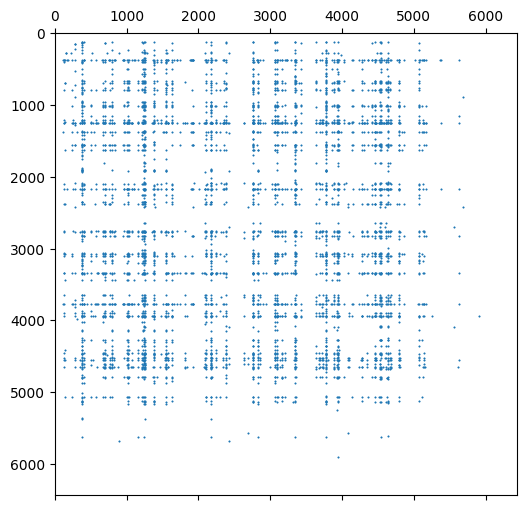

In [49]:
# YOUR CODE HERE
i = segments['ORIGIN_INDEX']
j = segments['DEST_INDEX']
data = segments['WEIGHT']

P = scipy.sparse.coo_matrix((data, (i, j)), shape=(n_airports, n_airports))

# Visually inspect your result:
spy(P)

In [50]:
# Test cell: `P_test`

assert type(P) is sp.sparse.coo.coo_matrix, \
       "Matrix object has type {}, and is not a Numpy COO sparse matrix.".format(type(P))
assert P.shape == (n_airports, n_airports), "Matrix has the wrong shape: it is {} x {} instead of {} x {}".format(P.shape[0], P.shape[1], n_airports, n_airports)

# Check row sums, which must be either 0 or 1
n = P.shape[0]
u = np.ones(n)
row_sums = P.dot(u)
is_near_zero = np.isclose(row_sums, 0.0, atol=10*n*np.finfo(float).eps)
is_near_one = np.isclose(row_sums, 1.0, atol=10*n*np.finfo(float).eps)
assert (is_near_zero | is_near_one).all()
assert sum(is_near_one) == n_actual

print("\n(Passed! You got 20 points!)")


(Passed! You got 20 points!)


/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_27278/1399497743.py:3: DeprecationWarning: Please use `coo_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.coo` namespace is deprecated.
  assert type(P) is sp.sparse.coo.coo_matrix, \


> **Note: Other formats.** The preceding code asked you to use coordinate ("COO") format to store the matrix. However, you may sometimes need to convert or use other formats. For example, SciPy provides many general graph processing algorithms in its [`csgraph` submodule](https://docs.scipy.org/doc/scipy/reference/sparse.csgraph.html). These routines expect the input graph as a sparse matrix, but one stored in compressed sparse row ("CSR") format rather than COO.

## Part 2, analysis: Computing the steady-state distribution

Armed with the state-transition matrix $P$, you can now compute the steady-state distribution.

**Exercise 15** (`x0_test`: 20 points). At time $t=0$, suppose the random flyer is equally likely to be at any airport with an outbound segment, i.e., the flyer is at one of the "actual" origins. Create a NumPy vector `x0[:]` such that `x0[i]` equals this initial probability of being at airport `i`.

> Note: If some airport $i$ has _no_ outbound flights, then be sure that $x_i(0) = 0$.

In [51]:
# Your task: Create `x0` as directed above.

# YOUR CODE HERE
actual_origins = segments['ORIGIN_INDEX'].nunique()
x0 = np.zeros(n_airports)
x0[i] = 1.0 / actual_origins

# Visually inspect your result:
def display_vec_sparsely(x, name='x'):
    i_nz = np.argwhere(x).flatten()
    df_x_nz = pd.DataFrame({'i': i_nz, '{}[i] (non-zero only)'.format(name): x[i_nz]})
    display(df_x_nz.head())
    print("...")
    display(df_x_nz.tail())
    
display_vec_sparsely(x0, name='x0')

,i,x0[i] (non-zero only)
0,119,0.003333
1,124,0.003333
2,125,0.003333
3,130,0.003333
4,138,0.003333


...


,i,x0[i] (non-zero only)
295,5565,0.003333
296,5612,0.003333
297,5630,0.003333
298,5685,0.003333
299,5908,0.003333


In [52]:
# Test cell: `x0_test`

assert type(x0) is np.ndarray, "`x0` does not appear to be a Numpy array."
assert np.isclose(x0.sum(), 1.0, atol=10*n*np.finfo(float).eps), "`x0` does not sum to 1.0, but it should."
assert np.isclose(x0.max(), 1.0/n_actual, atol=10*n*np.finfo(float).eps), "`x0` values seem off..."

print("\n(Passed! You got 20 points!)")


(Passed! You got 20 points!)


**Exercise 16** (`eval_markov_chain_test`: 20 points). Given the state-transition matrix `P`, an initial vector `x0`, and the number of time steps `t_max`, complete the function `eval_markov_chain(P, x0, t_max)` so that it computes and returns $x(t_{\textrm{max}})$.

In [53]:
def eval_markov_chain(P, x0, t_max):
    # YOUR CODE HERE
    x = np.array(x0)
    for _ in range(t_max):
        x = P.T.dot(x)
    return x

T_MAX = 50
x = eval_markov_chain(P, x0, T_MAX)
display_vec_sparsely(x)

print("\n=== Top 10 airports ===\n")
ranks = np.argsort(-x)
top10 = pd.DataFrame({'Rank': np.arange(1, 11),
                      'Code': airport_codes.iloc[ranks[:10]]['Code'],
                      'Description': airport_codes.iloc[ranks[:10]]['Description'],
                      'x(t)': x[ranks[:10]]})
top10[['x(t)', 'Rank', 'Code', 'Description']]

,i,x[i] (non-zero only)
0,119,0.000721
1,124,0.005492
2,125,0.000237
3,130,0.000238
4,138,0.000715


...


,i,x[i] (non-zero only)
295,5565,0.000472
296,5612,0.000239
297,5630,0.001889
298,5685,0.000465
299,5908,0.000239



=== Top 10 airports ===



,x(t),Rank,Code,Description
373,0.037384,1,10397,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
3770,0.036042,2,13930,"Chicago, IL: Chicago O'Hare International"
1245,0.031214,3,11292,"Denver, CO: Denver International"
3347,0.026761,4,13487,"Minneapolis, MN: Minneapolis-St Paul Internati..."
2177,0.024809,5,12266,"Houston, TX: George Bush Intercontinental/Houston"
1250,0.024587,6,11298,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
1375,0.024483,7,11433,"Detroit, MI: Detroit Metro Wayne County"
3941,0.021018,8,14107,"Phoenix, AZ: Phoenix Sky Harbor International"
4646,0.020037,9,14869,"Salt Lake City, UT: Salt Lake City International"
1552,0.019544,10,11618,"Newark, NJ: Newark Liberty International"


In [54]:
# Test cell: `eval_markov_chain_test`

print(x.sum())
assert np.isclose(x.sum(), 1.0, atol=T_MAX*n_actual*np.finfo(float).eps)

print("\nTop 10 airports by Markov chain analysis:\n", list(top10['Code']))
print("\nCompare that to the Top 10 by (historical) outbound segments:\n", list(origins_top10['ID']))

A = set(top10['Code'])
B = set(origins_top10['ID'])
C = (A - B) | (B - A)
print("\nAirports that appear in one list but not the other:\n{}".format(C))
assert C == {11618, 11433, 12266, 14771, 14869, 12889, 14747, 12892}

print("\n(Passed! You got 20 points!)")

0.9999999999999994

Top 10 airports by Markov chain analysis:
 [10397, 13930, 11292, 13487, 12266, 11298, 11433, 14107, 14869, 11618]

Compare that to the Top 10 by (historical) outbound segments:
 [10397, 13930, 11292, 12892, 14771, 11298, 14747, 12889, 14107, 13487]

Airports that appear in one list but not the other:
{11618, 11433, 12266, 14771, 14869, 12889, 14747, 12892}

(Passed! You got 20 points!)


**Comparing the two rankings.** Before ending this notebook, let's create a table that compares our two rankings, side-by-side, where the first ranking is the result of the Markov chain analysis and the second from a ranking based solely on number of segments.

In [55]:
top10_with_ranks = top10[['Code', 'Rank', 'Description']].copy()

origins_top10_with_ranks = origins_top10[['ID', 'Description']].copy()
origins_top10_with_ranks.rename(columns={'ID': 'Code'}, inplace=True)
origins_top10_with_ranks['Rank'] = origins_top10.index + 1
origins_top10_with_ranks = origins_top10_with_ranks[['Code', 'Rank', 'Description']]

top10_compare = top10_with_ranks.merge(origins_top10_with_ranks, how='outer', on='Code',
                                       suffixes=['_MC', '_Seg'])
top10_compare

,Code,Rank_MC,Description_MC,Rank_Seg,Description_Seg
0,10397,1.0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1.0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
1,13930,2.0,"Chicago, IL: Chicago O'Hare International",2.0,"Chicago, IL: Chicago O'Hare International"
2,11292,3.0,"Denver, CO: Denver International",3.0,"Denver, CO: Denver International"
3,13487,4.0,"Minneapolis, MN: Minneapolis-St Paul Internati...",10.0,"Minneapolis, MN: Minneapolis-St Paul Internati..."
4,12266,5.0,"Houston, TX: George Bush Intercontinental/Houston",NaN,NaN
5,11298,6.0,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",6.0,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
6,11433,7.0,"Detroit, MI: Detroit Metro Wayne County",NaN,NaN
7,14107,8.0,"Phoenix, AZ: Phoenix Sky Harbor International",9.0,"Phoenix, AZ: Phoenix Sky Harbor International"
8,14869,9.0,"Salt Lake City, UT: Salt Lake City International",NaN,NaN
9,11618,10.0,"Newark, NJ: Newark Liberty International",NaN,NaN


How exciting! You've determined the top 10 airports at which a random flyer ends up, assuming he or she randomly selects directly reachable destinations. How does it compare, qualitatively, to a ranking based instead on (historical) outbound segments? Which ranking is a better measure of importance to the overall airport network?

Think about what scenarios this could be useful. Potentially if you have a customer searching a website? The customer could start on any page,but you eventually would want to help drive them to check out. Knowing the likelihood each path hold, allows you to take actions to influence those paths, seeking your target outcome.

Be sure to submit this notebook to get credit for it.